# Julia is fast

Very often, benchmarks are used to compare languages.  These benchmarks can lead to long discussions, first as to exactly what is being benchmarked and secondly what explains the differences.  These simple questions can sometimes get more complicated than you at first might imagine.

The purpose of this notebook is for you to see a simple benchmark for yourself.  One can read the notebook and see what happened on the author's Macbook Pro with a 4-core Intel Core I7, or run the notebook yourself.

(This material began life as a wonderful lecture by Steven Johnson at MIT: https://github.com/stevengj/18S096-iap17/blob/master/lecture1/Boxes-and-registers.ipynb.)

# `sum`: An easy enough function to understand

Consider the  **sum** function `sum(a)`, which computes

$$
\mathrm{sum}(a) = \sum_{i=1}^n a_i.
$$

In [1]:
a = rand(10^7) # array of random numbers, uniform on [0,1)

10000000-element Array{Float64,1}:
 0.264427  
 0.244391  
 0.649658  
 0.0697313 
 0.0310463 
 0.0774908 
 0.669535  
 0.00744002
 0.482669  
 0.694787  
 0.92626   
 0.480593  
 0.123968  
 ⋮         
 0.91111   
 0.319946  
 0.368318  
 0.840289  
 0.461357  
 0.282798  
 0.444721  
 0.70132   
 0.531112  
 0.562241  
 0.247051  
 0.144536  

In [2]:
sum(a) # one expects this is 10^7 * .5 , since the mean of each entry is .5

5.001161073666024e6

# Benchmarking a few ways in a few languages

In [3]:
using BenchmarkTools  # Julia package for benchmarking

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/Blosc.ji for module Blosc.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/JLD.ji for module JLD.


#  1. The C language: (8.1 msecs)

C is fften considered the gold standard: difficult on the human, nice for the machine. Getting within a factor of 2 of C is often satisfying. Nonetheless, even within C, there are many kinds of optimizations possible that a naive C writer may or may not get the advantage of.

The current author does not speak C, so he does not read the cell below, but is happy to know that you can put C code in a Julia session, compile it, and run it.

In [9]:
C_code = """
#include <stddef.h>
double c_sum(size_t n, double *X) {
    double s = 0.0;
    for (size_t i = 0; i < n; ++i) {
        s += X[i];
    }
    return s;
}
"""

const Clib = tempname()   # make a temporary file


# compile to a shared library by piping C_code to gcc
# (works only if you have gcc installed):

open(`gcc -fPIC -std=c99  -O3 -msse3 -xc -shared -o $(Clib * "." * Libdl.dlext) -`, "w") do f
    print(f, C_code) 
end

# define a Julia function that calls the C function:
c_sum(X::Array{Float64}) = ccall(("c_sum", Clib), Float64, (Csize_t, Ptr{Float64}), length(X), X)

c_sum (generic function with 1 method)

In [11]:
c_sum(a), sum(a)

(5.001161073665754e6,5.001161073666024e6)

In [15]:
c_sum(a) ≈ sum(a) # type \approx and then <TAB> to get the ≈ symbol

true

We can now benchmark the C code directly from Julia:

In [16]:
c_bench = @benchmark c_sum($a)

BenchmarkTools.Trial: 
  memory estimate:  0.00 bytes
  allocs estimate:  0
  --------------
  minimum time:     10.161 ms (0.00% GC)
  median time:      10.318 ms (0.00% GC)
  mean time:        10.394 ms (0.00% GC)
  maximum time:     11.419 ms (0.00% GC)
  --------------
  samples:          481
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [23]:
data = c_bench.times/1e6
mean(data), minimum(data), maximum(data)

(10.393588723492723,10.161124,11.419066)

In [24]:
using  Plots

INFO: Precompiling module FixedSizeArrays.
INFO: Precompiling module PlotUtils.
INFO: Precompiling module PlotThemes.
INFO: Precompiling module Showoff.
INFO: Precompiling module Measures.


In [26]:
gr()

INFO: Precompiling module GR.


Plots.GRBackend()

In [49]:
#using Interact
#n=300
h =  histogram(data, nbins=n, title="Timing Histogram")

 
#?savefig

<?xml version="1.0" encoding="utf-8"?>
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 10.5 
 
 
 11.0 
 
 
 0 
 
 
 3 
 
 
 6 
 
 
 9 
 
 
 12 
 
 
 15 
 
 
 18 
 
 
 21 
 
 
 Timing Histogram 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 y1

In [50]:
savefig(h,"foo.eps")

  likely near In[50]:1
  likely near In[50]:1
  likely near In[50]:1
  likely near In[50]:1
  likely near In[50]:1
  likely near In[50]:1
  likely near In[50]:1
in eps at 
  likely near In[50]:1
  likely near In[50]:1
in eps at /opt/julia_packages/.julia/v0.5/Plots/src/output.jl
  likely near In[50]:1
in eps at /opt/julia_packages/.julia/v0.5/Plots/src/output.jl
  likely near In[50]:1
in eps at /opt/julia_packages/.julia/v0.5/Plots/src/output.jl


In [52]:
;ls -lrt foo*

-rw-r--r-- 1 juser juser 14637 Jan 17 06:15 foo.png
-rw-r--r-- 1 juser juser  7700 Jan 17 06:16 foo.pdf
-rw-r--r-- 1 juser juser     0 Jan 17 06:20 foo.eps


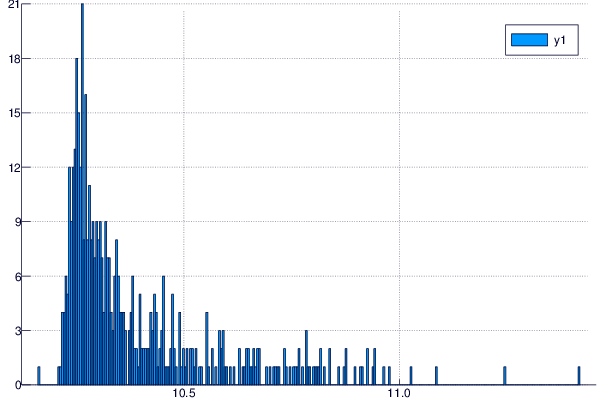

In [47]:
load("foo.pdf")

In [53]:
println("C: Fastest time was $(minimum(c_bench.times)/1e6) msecs.")

C: Fastest time was 10.161124 msecs.


# 2. Python's built in `sum` (68 msecs)

In [54]:
# Julia interface to Python:
using PyCall

INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/Conda.ji for module Conda.
INFO: Recompiling stale cache file /home/juser/.julia/lib/v0.5/PyCall.ji for module PyCall.


In [55]:
# call a low-level PyCall function to get a Python list, because
# by default PyCall will convert to a NumPy array instead (we benchmark NumPy below):

apy_list = PyCall.array2py(a, 1, 1)

# get the Python built-in "sum" function:
pysum = pybuiltin("sum")

PyObject <built-in function sum>

In [56]:
pysum(a)

5.001161073665754e6

In [57]:
pysum(a) ≈ sum(a)

true

In [58]:
py_list_bench = @benchmark $pysum($apy_list)

BenchmarkTools.Trial: 
  memory estimate:  672.00 bytes
  allocs estimate:  19
  --------------
  minimum time:     132.689 ms (0.00% GC)
  median time:      134.697 ms (0.00% GC)
  mean time:        134.532 ms (0.00% GC)
  maximum time:     139.764 ms (0.00% GC)
  --------------
  samples:          38
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [59]:
println("Python (built in): fastest time was $(minimum(py_list_bench.times)/1e6) msecs.")

Python (built in): fastest time was 132.688914 msecs.


# 3. Python: `numpy` (3.9 msec)  

## Takes advantage of hardware "SIMD", but only works when it works.

`numpy` is an optimized C library, callable from Python

If it is not installed, install it from Julia as follows:

In [63]:
# using Conda 
# Conda.add("numpy")
Pkg.build("PyCall")

LoadError: PyCall is not an installed package

In [60]:
numpy_sum = pyimport("numpy")["sum"]
apy_numpy = PyObject(a) # converts to a numpy array by default

py_numpy_bench = @benchmark $numpy_sum($apy_numpy)

BenchmarkTools.Trial: 
  memory estimate:  960.00 bytes
  allocs estimate:  25
  --------------
  minimum time:     9.810 ms (0.00% GC)
  median time:      10.401 ms (0.00% GC)
  mean time:        10.347 ms (0.00% GC)
  maximum time:     10.936 ms (0.00% GC)
  --------------
  samples:          484
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [61]:
numpy_sum(apy_list) # python thing

5.001161073665754e6

In [62]:
numpy_sum(apy_list) ≈ sum(a)

true

# 4. Python, hand written (419 msec!)

In [64]:
# It currently takes a little bit of hackery to define a custom Python function
# in a Julia string and call it via PyCall, sorry:

syms = PyDict{AbstractString, PyObject}()
syms["syms"] = PyObject(Any[])

pyeval("""
def mysum(a):
    s = 0.0
    for x in a:
        s = s + x
    return s

syms.insert(0, mysum)
""", PyAny, syms, PyCall.Py_file_input)

mysum_py = syms["syms"][1] # a reference to the Python mysum function

PyObject <function mysum at 0x7f4727d1c2a8>

In [65]:
@benchmark $mysum_py($apy_list)

BenchmarkTools.Trial: 
  memory estimate:  672.00 bytes
  allocs estimate:  19
  --------------
  minimum time:     451.740 ms (0.00% GC)
  median time:      644.155 ms (0.00% GC)
  mean time:        595.004 ms (0.00% GC)
  maximum time:     720.880 ms (0.00% GC)
  --------------
  samples:          9
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [66]:
mysum_py(apy_list)

5.001161073665754e6

In [67]:
mysum_py(apy_list) ≈ sum(a)

true

# 5. Julia (built-in) (3.7 msec) 

## Written directly in Julia, not in C!

In [68]:
@which sum(a)

sum(a) at reduce.jl:229

In [69]:
j_bench = @benchmark sum($a)

BenchmarkTools.Trial: 
  memory estimate:  0.00 bytes
  allocs estimate:  0
  --------------
  minimum time:     6.083 ms (0.00% GC)
  median time:      6.321 ms (0.00% GC)
  mean time:        6.315 ms (0.00% GC)
  maximum time:     6.558 ms (0.00% GC)
  --------------
  samples:          792
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

# 6. Julia (hand-written) (8.1 msec, same as hand-written C)

In [76]:
function mysum(A)   
    s = A[1]
    for a in A[2:end]
        s += a
    end
    s
end

mysum (generic function with 1 method)

In [73]:
j_bench_hand = @benchmark mysum($a)

BenchmarkTools.Trial: 
  memory estimate:  0.00 bytes
  allocs estimate:  0
  --------------
  minimum time:     9.622 ms (0.00% GC)
  median time:      10.354 ms (0.00% GC)
  mean time:        10.359 ms (0.00% GC)
  maximum time:     11.220 ms (0.00% GC)
  --------------
  samples:          483
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

# 7. Julia (with a severe naive mistake)

In [74]:
function my_bad_julia(A)   
    s = 0  # my kingdom for a decimal point
    for a in A
        s += a
    end
    s
end

my_bad_julia (generic function with 1 method)

In [75]:
@benchmark my_bad_julia(a)

BenchmarkTools.Trial: 
  memory estimate:  457.76 mb
  allocs estimate:  30000000
  --------------
  minimum time:     226.769 ms (16.61% GC)
  median time:      230.351 ms (17.47% GC)
  mean time:        230.803 ms (17.41% GC)
  maximum time:     237.604 ms (18.05% GC)
  --------------
  samples:          22
  evals/sample:     1
  time tolerance:   5.00%
  memory tolerance: 1.00%

In [77]:
my_bad_julia(a) ≈ sum(a)

true

In [85]:
a= [ rand(2,2) for i=1:10^7];

In [86]:
a[1]

2×2 Array{Float64,2}:
 0.289872   0.685935
 0.0517198  0.953344

In [84]:
zero(eltype(a))

0.0 + 0.0im

In [87]:
x=1
y=1.0
x+y




2.0

In [88]:
@code_native(x+y)

	.text
Filename: promotion.jl
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 190
	cvtsi2sdq	%rdi, %xmm1
	addsd	%xmm1, %xmm0
	popq	%rbp
	retq
	nop


In [89]:
@code_native(1+1)

	.text
Filename: int.jl
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 32
	leaq	(%rdi,%rsi), %rax
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [90]:
@code_native(1.0+1.0)

	.text
Filename: float.jl
	pushq	%rbp
	movq	%rsp, %rbp
Source line: 240
	addsd	%xmm1, %xmm0
	popq	%rbp
	retq
	nopw	(%rax,%rax)


In [93]:
@code_warntype(x+y)

Variables:
  #self#::Base.#+
  x::Int64
  y::Float64

Body:
  begin 
      return (Base.box)(Base.Float64,(Base.add_float)((Base.box)(Float64,(Base.sitofp)(Float64,x::Int64)),y::Float64))
  end::Float64


In [94]:
a=1
b=1
@code_warntype(a+b)

Variables:
  #self#::Base.#+
  x::Int64
  y::Int64

Body:
  begin 
      return (Base.box)($(Expr(:static_parameter, 1)),(Base.add_int)(x::Int64,y::Int64))
  end::Int64


In [97]:
@code_warntype my_bad_julia([1,2,3])

Variables:
  #self#::#my_bad_julia
  A::Array{Int64,1}
  s::Int64
  #temp#::Int64
  a::Int64

Body:
  begin 
      s::Int64 = 0 # line 3:
      #temp#::Int64 = $(QuoteNode(1))
      4: 
      unless (Base.box)(Base.Bool,(Base.not_int)((#temp#::Int64 === (Base.box)(Int64,(Base.add_int)((Base.arraylen)(A::Array{Int64,1})::Int64,1)))::Bool)) goto 14
      SSAValue(2) = (Base.arrayref)(A::Array{Int64,1},#temp#::Int64)::Int64
      SSAValue(3) = (Base.box)(Int64,(Base.add_int)(#temp#::Int64,1))
      a::Int64 = SSAValue(2)
      #temp#::Int64 = SSAValue(3) # line 4:
      s::Int64 = (Base.box)(Int64,(Base.add_int)(s::Int64,a::Int64))
      12: 
      goto 4
      14:  # line 6:
      return s::Int64
  end::Int64


In [98]:
@code_warntype my_bad_julia([1,2,3.0])

Variables:
  #self#::#my_bad_julia
  A::Array{Float64,1}
  s::Any
  #temp#@_4::Int64
  a::Float64
  #temp#@_6::LambdaInfo
  #temp#@_7::Float64

Body:
  begin 
      s::Any = 0 # line 3:
      #temp#@_4::Int64 = $(QuoteNode(1))
      4: 
      unless (Base.box)(Base.Bool,(Base.not_int)((#temp#@_4::Int64 === (Base.box)(Int64,(Base.add_int)((Base.arraylen)(A::Array{Float64,1})::Int64,1)))::Bool)) goto 29
      SSAValue(2) = (Base.arrayref)(A::Array{Float64,1},#temp#@_4::Int64)::Float64
      SSAValue(3) = (Base.box)(Int64,(Base.add_int)(#temp#@_4::Int64,1))
      a::Float64 = SSAValue(2)
      #temp#@_4::Int64 = SSAValue(3) # line 4:
      unless (Core.isa)(s::Union{Float64,Int64},Float64)::Any goto 14
      #temp#@_6::LambdaInfo = LambdaInfo for +(::Float64, ::Float64)
      goto 23
      14: 
      unless (Core.isa)(s::Union{Float64,Int64},Int64)::Any goto 18
      #temp#@_6::LambdaInfo = LambdaInfo for +(::Int64, ::Float64)
      goto 23
      18: 
      goto 20
      20: 
      #temp#

In [101]:
a = rand(0:9,10^7) # 10 million integers
b = rand(10^7)   # 10 million floats
@time my_bad_julia( a)

  0.009146 seconds (5 allocations: 176 bytes)


44991452

In [103]:
@time my_bad_julia(b )

  0.232847 seconds (30.00 M allocations: 457.764 MB, 20.98% gc time)


4.999984327813511e6

In [104]:
a[1:5]

5-element Array{Int64,1}:
 1
 9
 8
 7
 7

In [105]:
b[1:5]

5-element Array{Float64,1}:
 0.349059
 0.789886
 0.951088
 0.464013
 0.878426

In [106]:
?bessel

search: bessely besselk besselj besseli besselh besselyx bessely1 bessely0

Couldn't find bessel
Perhaps you meant besselh, besseli, besselj, besselk, bessely or besselhx


No documentation found.

Binding `bessel` does not exist.


In [107]:
?gamma

search: gamma gammacovs lgamma digamma trigamma polygamma invdigamma eulergamma



```
gamma(x)
```

Compute the gamma function of `x`.


In [ ]:
@edit rand(1)

Vim: Warning: Output is not to a terminal
Vim: Warning: Input is not from a terminal


</bin/../share/julia/base/random.jl" [readonly] 1438L, 69316C# This file is a part of Julia. License is MIT: http://julialang.org/license

module Random

using Base.dSFMT
using Base.GMP: GMP_VERSION, Limb
import Base: copymutable, copy, copy!, ==

export srand,rand, rand!,randn, randn!,randexp, randexp!,bitrand,randstring,randsubseq,randsubseq!,shuffle,shuffle!,randperm, randcycle,AbstractRNG, MersenneTwister, RandomDevice,GLOBAL_RNG, randjump


abstract AbstractRNG

abstract FloatInterval
type CloseOpen <: FloatInterval end
type Close1Open2 <: FloatInterval end


## RandomDevice1,1Top